## Ejercicio 2 – Función acumulada ponderada

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import operator

### Variable discreta

Sea X, una variable aleatoria, el # de caras en 3 lanzamientos de una moneda no cargada, su función de masa sería la siguiente:

In [50]:
funcion_de_masa = {
    0: 1/8, # 0 caras con probabilidad de 1/8
    1: 3/8, # 1 caras con probabilidad de 3/8
    2: 3/8, # 2 caras con probabilidad de 3/8
    3: 1/8  # 3 caras con probabilidad de 1/8
}

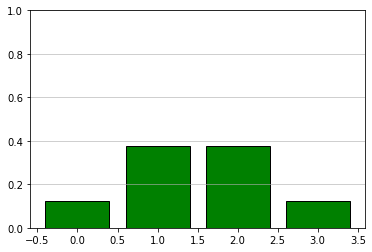

In [51]:
plt.bar(funcion_de_masa.keys(), funcion_de_masa.values(), color='g', edgecolor='black', linewidth=1)
plt.ylim((0, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

### Variable continua

In [45]:
funcion_de_masa = {
    (0, operator.lt): 1/10,       # x < 0: 0
    (1, operator.lt): 3/10,     # 0 <= x < 1: 1/2
    (2, operator.lt): 2/10,    # 1 <= x < 2: 1/10
    (3, operator.lt): (0.5)/10,     # 2 <= x < 3: 1/5
    (4, operator.lt): (0.5)/10,    # 3 <= x < 4: 1/10
    (4, operator.ge): 3/10     # x >= 4: 1/10
}

In [46]:
numeros = np.arange(-10, 10, 1)

In [47]:
xs = []
ys = []
for num in numeros:
    for key, value in funcion_de_masa.items():
        if key[1](num, key[0]):
            xs.append(num)
            ys.append(value)
            break

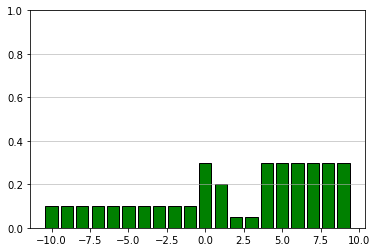

In [48]:
plt.bar(xs, ys, color='g', edgecolor='black', linewidth=1)
plt.ylim((0, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

## Ejercicio 3 - Valor presente Neto

In [129]:
import numpy as np
import matplotlib.pyplot as plt

In [130]:
def distribucion_normal(media, desviacion_standar):
    return np.random.normal(media, desviacion_standar)

def distribucion_uniforme(media, desviacion_standar):
    return np.random.uniform(media - desviacion_standar, media + desviacion_standar)

def vpn(flujo, tiempo, tasa):
    if tiempo == 0:
        return flujo
    return flujo / (1 + tasa)**tiempo

In [131]:
proyecto_hotel = [
    (-800, 0, distribucion_uniforme),
    (-800, 50, distribucion_normal),
    (-800, 100, distribucion_normal),
    (-700, 150, distribucion_normal),
    (300, 200, distribucion_normal), 
    (400, 200, distribucion_normal),
    (500, 200, distribucion_normal),
    (200, 8440, distribucion_uniforme)
]

In [132]:
proyecto_centrocomercial = [
    (-900, 0, distribucion_uniforme),
    (-600, 50, distribucion_normal),
    (-200, 50, distribucion_normal),
    (-600, 100, distribucion_normal),
    (250, 150, distribucion_normal), 
    (350, 150, distribucion_normal),
    (400, 150, distribucion_normal),
    (1600, 6000, distribucion_uniforme)
]

In [133]:
r = 0.10

### 100 iteraciones

In [134]:
N = 100

In [135]:
hotel = 0
centro_comercial = 0
for i in range(N):
    valor_presente_hotel = 0
    for i in range(len(proyecto_hotel)):
        c = proyecto_hotel[i][2](proyecto_hotel[i][0], proyecto_hotel[i][1])
        valor_presente_hotel += vpn(c, i, r)

    valor_presente_centrocomercial = 0
    for i in range(len(proyecto_centrocomercial)):
        c = proyecto_centrocomercial[i][2](proyecto_centrocomercial[i][0], proyecto_centrocomercial[i][1])
        valor_presente_centrocomercial += vpn(c, i, r)

    if valor_presente_hotel > valor_presente_centrocomercial:
        hotel += 1
    else:
        centro_comercial += 1

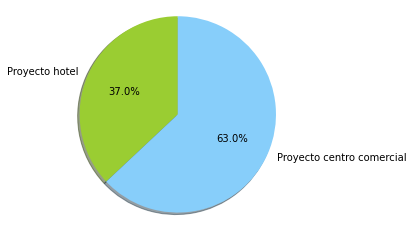

In [136]:
labels = ['Proyecto hotel', 'Proyecto centro comercial']
sizes = [hotel, centro_comercial]
colors = ['yellowgreen', 'lightskyblue']
patches = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%', labels=labels)
plt.axis('equal')
plt.show()

### 1000 iteraciones

In [137]:
N = 1000

In [138]:
hotel = 0
centro_comercial = 0
for i in range(N):
    valor_presente_hotel = 0
    for i in range(len(proyecto_hotel)):
        c = proyecto_hotel[i][2](proyecto_hotel[i][0], proyecto_hotel[i][1])
        valor_presente_hotel += vpn(c, i, r)

    valor_presente_centrocomercial = 0
    for i in range(len(proyecto_centrocomercial)):
        c = proyecto_centrocomercial[i][2](proyecto_centrocomercial[i][0], proyecto_centrocomercial[i][1])
        valor_presente_centrocomercial += vpn(c, i, r)

    if valor_presente_hotel > valor_presente_centrocomercial:
        hotel += 1
    else:
        centro_comercial += 1

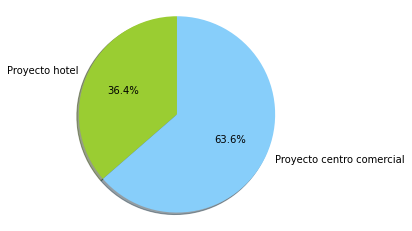

In [139]:
labels = ['Proyecto hotel', 'Proyecto centro comercial']
sizes = [hotel, centro_comercial]
colors = ['yellowgreen', 'lightskyblue']
patches = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%', labels=labels)
plt.axis('equal')
plt.show()

### 10000 iteraciones

In [140]:
N = 100000

In [141]:
hotel = 0
centro_comercial = 0
for i in range(N):
    valor_presente_hotel = 0
    for i in range(len(proyecto_hotel)):
        c = proyecto_hotel[i][2](proyecto_hotel[i][0], proyecto_hotel[i][1])
        valor_presente_hotel += vpn(c, i, r)

    valor_presente_centrocomercial = 0
    for i in range(len(proyecto_centrocomercial)):
        c = proyecto_centrocomercial[i][2](proyecto_centrocomercial[i][0], proyecto_centrocomercial[i][1])
        valor_presente_centrocomercial += vpn(c, i, r)

    if valor_presente_hotel > valor_presente_centrocomercial:
        hotel += 1
    else:
        centro_comercial += 1

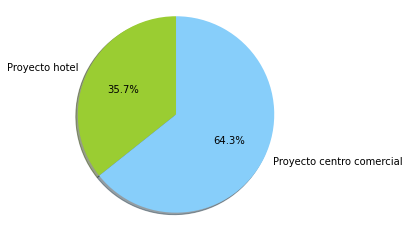

In [142]:
labels = ['Proyecto hotel', 'Proyecto centro comercial']
sizes = [hotel, centro_comercial]
colors = ['yellowgreen', 'lightskyblue']
patches = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%', labels=labels)
plt.axis('equal')
plt.show()